**LAB 4 - Multivariate Linear and Polynomial Regression, and Evaluation using MAE and MAPE.**

1.Use the code provided below to get the data, and run the train-test split. Description of each column can be found in sklearn documentation. Look at the documentation for the load_diabetes method to know what are as_frame and scaled for.

In [2]:
#import libraries
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#import dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

In [4]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,68.0,2.0,27.5,111.0,214.0,147.0,39.0,5.0,4.9416,91.0
66,46.0,2.0,24.7,85.0,174.0,123.2,30.0,6.0,4.6444,96.0
137,50.0,1.0,31.0,123.0,178.0,105.0,48.0,4.0,4.8283,88.0
245,41.0,1.0,23.1,86.0,148.0,78.0,58.0,3.0,4.0943,60.0
31,42.0,1.0,20.3,71.0,161.0,81.2,66.0,2.0,4.2341,81.0
...,...,...,...,...,...,...,...,...,...,...
106,22.0,1.0,19.3,82.0,156.0,93.2,52.0,3.0,3.9890,71.0
270,50.0,2.0,29.2,119.0,162.0,85.2,54.0,3.0,4.7362,95.0
348,57.0,1.0,24.5,93.0,186.0,96.6,71.0,3.0,4.5218,91.0
435,45.0,1.0,24.2,83.0,177.0,118.4,45.0,4.0,4.2195,82.0


2. Run a multivariate linear regression on all variables

In [5]:
#linear regression model
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model

LinearRegression()

In [6]:
#fit the model with training sets
linear_model.fit(X_train,y_train)

LinearRegression()

In [7]:
#find the coefficients,intercept
linear_coef=linear_model.coef_
linear_intercept=linear_model.intercept_

print("coefficients of linear regression :" ,linear_coef)
print("intercept of linear regression :" ,linear_intercept)

coefficients of linear regression : [  0.13768782 -23.06446772   5.84636265   1.19709252  -1.28168474
   0.81115203   0.60165319  10.15953917  67.1089624    0.20159907]
intercept of linear regression : -341.378236333505


In [8]:
#predict the LINEAR MODEL(x train and y train)
y_pred_x_train=linear_model.predict(X_train)
y_pred_x_test=linear_model.predict(X_test)

3. Run a multivariate polynomial regression of the 2nd degree on all variable (Hint: set include_bias=False in PolynomialFeatures)

In [9]:
#create polynomial features with degree 2
poly_features=PolynomialFeatures(degree = 2, include_bias=False)


In [10]:
#transform the polynomial feature
X_poly_train= poly_features.fit_transform(X_train)
X_poly_test= poly_features.fit_transform(X_test)


In [11]:
#Create a linear regression with independent variables
poly_model=LinearRegression()

In [12]:
#fit the polynomial model
poly_model.fit(X_poly_train,y_train)

LinearRegression()

In [13]:
#find the coefficients , intercept
poly_coef=poly_model.coef_
poly_intercept=poly_model.intercept_

print("coefficients of polynomial :" ,poly_coef)
print("intercept of polynomial:" ,poly_intercept)

coefficients of polynomial : [-9.58870948e+00 -1.12365875e+01 -1.97034162e+01  1.06379230e+01
 -1.65861249e+01  2.61365196e+01  1.11310664e+01 -1.60285455e+02
 -1.76867225e+03 -1.38219346e+01  3.15406146e-02  5.27927859e-01
 -5.05251654e-02  8.27864414e-03 -4.69221125e-03 -4.11958227e-02
  7.90051404e-02  1.31330339e+00  4.05782665e-01  1.29086977e-02
 -3.37097664e+01  3.56392866e-01  4.11635640e-01  2.10945698e-01
  2.46979126e-01 -1.23858285e+00 -2.67405149e+01  1.85205406e+01
  2.71714002e-01  9.30386694e-02  1.24233391e-01 -9.12925112e-02
  1.23145042e-01 -8.38998326e-03 -1.42557179e+00  3.63090460e+00
  2.11743234e-02 -3.04122515e-03  9.44206880e-02 -7.89080772e-02
 -1.05037131e-01 -1.77369257e-01 -2.47742390e+00 -4.70871259e-02
  1.76808663e-01 -2.77391465e-01 -3.11818052e-01 -1.28145919e+00
 -5.05386041e+00 -4.46697115e-02  1.11992817e-01  1.98609397e-01
  3.73559356e-01  3.37682457e+00  2.68468399e-02  1.49596869e-01
  2.19722165e+00  4.45625595e+00  1.18907975e-01  1.63126546e

In [14]:
#predict the polynomial model
y_pred_poly_train=poly_model.predict(X_poly_train)
y_pred_poly_test=poly_model.predict(X_poly_test)

4. Compare the two models by looking at MAE and MAPE using the provided function

In [15]:
def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals') 
    
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')

    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

model estimation for linear model

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


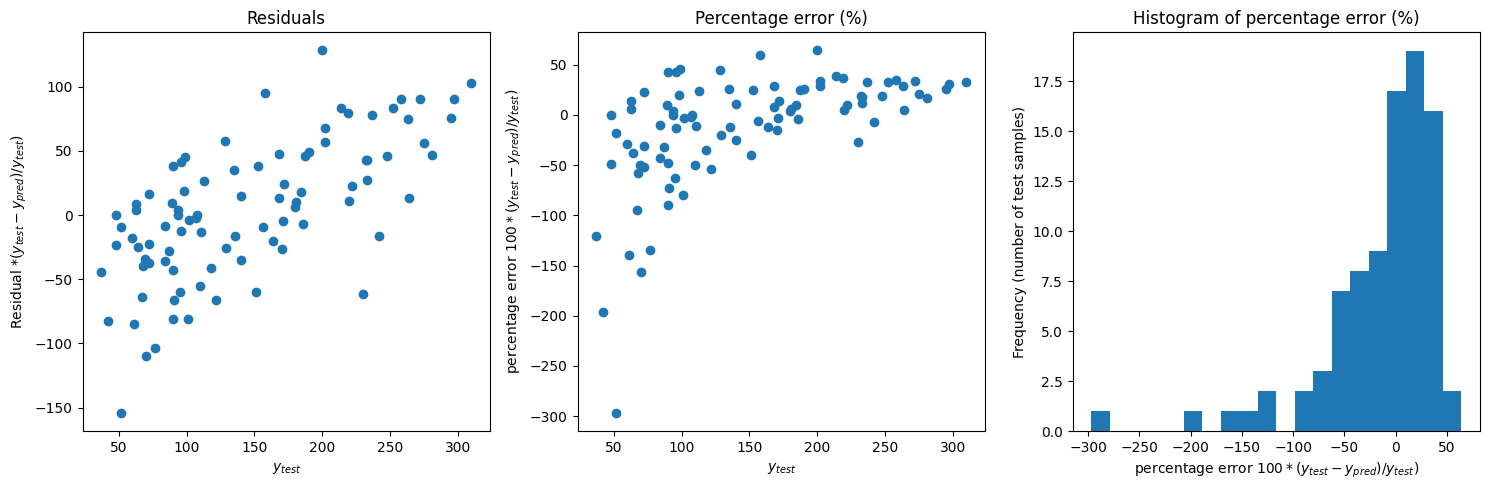

In [16]:
model_estimation(linear_model, y_train, y_test, y_pred_x_train, y_pred_x_test)

model estimation for polynomial 

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

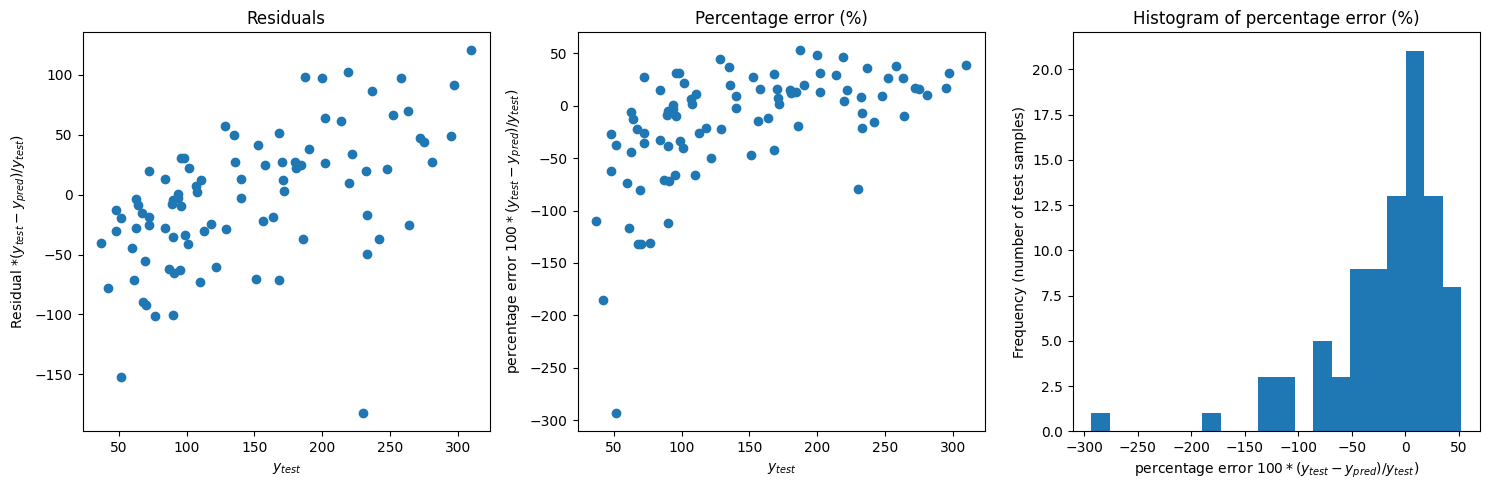

In [17]:
model_estimation(poly_model, y_train, y_test, y_pred_poly_train, y_pred_poly_test)

5. Add any further comparisons and code

In [18]:
#finding the mean absolute percentage error
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'Test Dataset: Mean Absolute Percentage Error (Linear Regression): {mean_absolute_percentage_error(y_test, y_pred_x_test):.2f}%')
print(f'Test Dataset: Mean Absolute Percentage Error (Polynomial Regression): {mean_absolute_percentage_error(y_test, y_pred_poly_test):.2f}%')


Test Dataset: Mean Absolute Percentage Error (Linear Regression): 37.50%
Test Dataset: Mean Absolute Percentage Error (Polynomial Regression): 38.29%


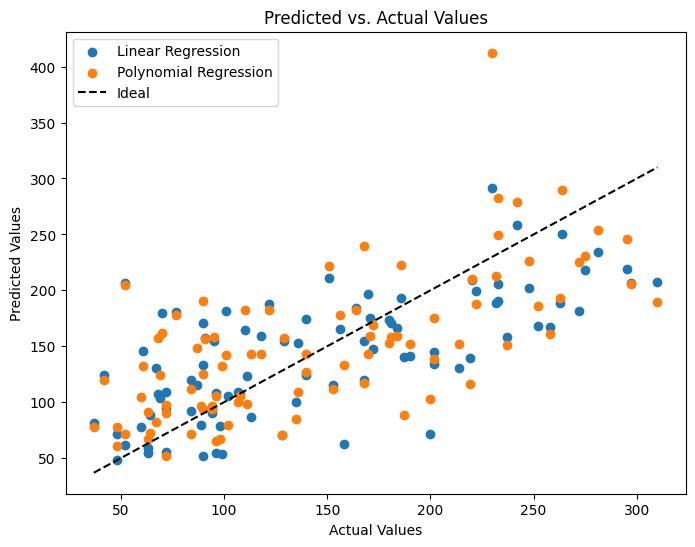

In [28]:
# plot linear and polynomial egression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_x_test, label='Linear Regression')
plt.scatter(y_test, y_pred_poly_test, label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [20]:
#printing all the coefficients of linear and polynomial regression
print('Linear Regression Coefficients:')
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f'{feature}: {coef:.2f}')
print("------------------------")
print('polynomial Regression Coefficients:')
for feature, coef in zip(X.columns, poly_model.coef_):
    print(f'{feature}: {coef:.2f}')


Linear Regression Coefficients:
age: 0.14
sex: -23.06
bmi: 5.85
bp: 1.20
s1: -1.28
s2: 0.81
s3: 0.60
s4: 10.16
s5: 67.11
s6: 0.20
------------------------
polynomial Regression Coefficients:
age: -9.59
sex: -11.24
bmi: -19.70
bp: 10.64
s1: -16.59
s2: 26.14
s3: 11.13
s4: -160.29
s5: -1768.67
s6: -13.82


We used the training dataset, X_train, to fit the linear regression model (linear_model), and we used the transformed training dataset, X_train_poly, to fit the polynomial regression model (poly_model). You can view the shapes of these independent training datasets as follows:

In [21]:
X_train.shape

(353, 10)

In [22]:
X_poly_train.shape

(353, 65)

**QUESTION AND ANSWERS**

1.How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out().

From the analysis, it can be observed that the linear model (linear_model) has 10 parameters fitted, which correspond to the original independent variables from the loaded dataset. These 10 features are the direct inputs to the linear model.

On the other hand, after transforming the features of X_train into polynomial features of degree 2 using PolynomialFeatures, the transformed training set (X_train_poly) contains 65 features. The increase in the number of features is attributed to the inclusion of interaction terms among the independent variables. These interaction terms capture the pairwise interactions between the original features, resulting in an expanded feature space.

In summary, the polynomial model (poly_model) fits 65 parameters, corresponding to the 65 features generated by the polynomial transformation. These features include the original independent variables as well as the interaction terms, enabling the model to capture more complex relationships between the variables.

In [23]:
poly_features.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

2.Which model would you choose for deployment, and why?

Among the 65 features generated by the polynomial transformation, 10 of them correspond to the original features, namely: age, sex, bmi, bp, s1, s2, s3, s4, s5, and s6. These features represent the direct inputs and their individual effects on the dependent variable.

Another set of 10 features are the second-degree terms of the original features, such as age^2, sex^2, bmi^2, bp^2, and so on. These features capture the quadratic relationships between the original variables and allow the model to account for non-linear effects.

The remaining 45 features are interaction terms that represent the pairwise interactions between the independent variables. For example, agebmi, sexbp, s1*s2, and so on.

3.What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

In [24]:
import math
from sklearn.metrics import mean_squared_error


mae_linear = mean_absolute_error(y_test, y_pred_x_test)
mse_linear=mean_squared_error(y_test, y_pred_x_test)
rmse_linear=math.sqrt(mse_linear)
print("Mean Absolute Error for Linear Model: ", mae_linear)
print("mean squared error for Linear Model: ", mse_linear)
print("root Mean Error for Linear Model: ", rmse_linear)

Mean Absolute Error for Linear Model:  42.79409467959993
mean squared error for Linear Model:  2900.193628493482
root Mean Error for Linear Model:  53.85344583676593


In [25]:
mae_poly = mean_absolute_error(y_test, y_pred_poly_test)
mse_poly =mean_squared_error(y_test, y_pred_poly_test)
rmse_poly=math.sqrt(mse_poly)
print("Mean Absolute Error for Linear Model: ", mae_poly)
print("mean squared error for Linear Model: ", mse_poly)
print("root Mean Error for Linear Model: ", rmse_poly)

Mean Absolute Error for Linear Model:  43.581693254265154
mean squared error for Linear Model:  3096.028307335211
root Mean Error for Linear Model:  55.641965343930934


Based on the provided mean absolute error (MAE), mean square error (MSE), root mean square error (RMSE), and mean absolute percentage error (MAPE) values, we can compare the performance of the linear regression model (linear_model) and the polynomial regression model (poly_model).

For both MAE and MAPE, the lower the value, the better the model's accuracy. Comparing the MAE and MAPE values between the two models, we can see that the linear regression model (linear_model) has slightly lower values compared to the polynomial regression model (poly_model). This indicates that the linear regression model has slightly better accuracy in predicting the target variable.

Regarding MSE and RMSE, these metrics also measure the average squared difference between the predicted and actual values. Again, lower values indicate better performance. In this case, the linear regression model has a slightly lower MSE and RMSE compared to the polynomial regression model.

Considering the above metrics and the fact that the linear regression model has slightly better performance across multiple evaluation metrics, the **linear_model** might be preferred for deployment. It provides a simpler model with slightly better accuracy and lower error values.

However, it is important to note that the difference in performance between the two models is relatively small.